In [1]:
# 导入所需的库
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
def split_data_by_time(X, y, test_ratio=0.2):
    # 按时间顺序切分数据集
    total_samples = len(X)
    train_size = int((1 - test_ratio) * total_samples)
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
    return X_train, X_test, y_train, y_test

In [3]:
def visualize_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, s=10)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Value')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Value')
    plt.show()

In [4]:
def visualize_results(y_test, y_pred):
    plt.scatter(y_test, y_pred, s=10, label='Test data')
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.title('Actual Value vs Predicted Value')
    plt.legend()
    plt.show()

In [5]:
def train_and_evaluate(X_train, X_test, y_train, y_test):
    # 训练模型
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # 进行预测
    y_pred = model.predict(X_test)
    
    # 评估模型
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.3f}')
    r2 = r2_score(y_test, y_pred)
    print(f'R^2 Score: {r2:.3f}')
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE: {mae:.3f}')
    # 输出每个自变量的系数，保留三位小数
    coefficients = ", ".join([f"{coef:.3f}" for coef in model.coef_])
    print(f"Coefficients : {coefficients}")
    # 输出截距（误差项），保留三位小数
    print(f"Intercept: {model.intercept_:.3f}")
    # 可视化实际值与预测值
    visualize_results(y_test, y_pred)
    # 可视化残差图
    visualize_residuals(y_test, y_pred)

In [6]:
def standardize_dataframe(df, column_begin=2):
    """
    对DataFrame中指定的列进行标准化。
    
    参数:
    df: pandas.DataFrame - 待处理的DataFrame。
    columns_to_scale: list - 需要标准化的列名列表。
    
    返回:
    df_final: pandas.DataFrame - 包含标准化列和未标准化列的新DataFrame。
    """
    # 创建StandardScaler对象
    scaler = StandardScaler()
    columns_to_scale = df.columns[column_begin:]
    # 对指定列进行标准化
    df_scaled = scaler.fit_transform(df[columns_to_scale])
    
    # 将标准化后的数据转换回DataFrame格式，并赋予正确的列名
    df_scaled = pd.DataFrame(df_scaled, columns=columns_to_scale)
    
    # 将未标准化的列与标准化后的数据合并
    # 假设未标准化的列在DataFrame的前面
    non_scaled_columns = [col for col in df.columns if col not in columns_to_scale]
    df_non_scaled = df[non_scaled_columns].reset_index(drop=True)
    
    df_final = pd.concat([df_non_scaled, df_scaled.reset_index(drop=True)], axis=1)
    
    return df_final
# 示例使用
# df_factor_final = standardize_dataframe(df_factor, columns_to_scale)
# df_factor_final.head()

In [7]:
factor_path = '../factor/1000/2018_1000.csv'
label_path = '../factor/label.csv'

df_factor = pd.read_csv(factor_path, nrows=100000)
df_label = pd.read_csv(label_path, nrows=100000)
    
# 筛选特定时间的标签数据
df_label_1000 = df_label[df_label['time'] == '10:00:00'].sort_values(by=['date', 'code'])

df_factor.head()

,date,code,factor000,factor001,factor002,factor003,factor004,factor005,factor006,factor007,...,factor490,factor491,factor492,factor493,factor494,factor495,factor496,factor497,factor498,factor499
0,2018-01-02,000001.XSHE,-0.8850,1.494,1.6930,1.7250,-0.3691,-1.2340,-0.48300,1.6700,...,-1.70100,-1.57600,-1.164,0.0878,0.4082,-0.3967,1.5960,1.3560,-1.4790,-1.6140
1,2018-01-02,000002.XSHE,1.1860,1.545,1.3880,1.6310,-1.2130,-1.4330,-1.54900,1.6750,...,-0.93650,-1.09800,-1.066,1.0670,-0.4070,-0.6553,1.3470,0.9307,-1.6850,-1.5620
2,2018-01-02,000004.XSHE,-1.1990,0.220,0.1958,-0.3176,0.7140,0.8413,-0.08673,-1.4410,...,-0.82860,1.27600,-1.259,-0.2119,-0.5186,0.2637,-1.4375,-0.9595,0.5160,0.6377
3,2018-01-02,000005.XSHE,-1.7310,1.726,1.0710,1.5440,-0.9340,1.2100,-1.15300,-0.2474,...,-1.49800,1.72200,1.604,-0.7607,1.6660,1.6950,-0.9688,0.2705,0.7190,1.7140
4,2018-01-02,000008.XSHE,0.9756,1.166,-0.7896,0.1338,-0.7020,0.2222,-1.40800,0.1453,...,0.09015,-0.00861,1.128,-0.3910,-1.1510,0.8540,1.3300,-0.3784,-0.9824,1.3760


In [8]:
df_factor_final = standardize_dataframe(df_factor, 2)
df_factor_final.head()

,date,code,factor000,factor001,factor002,factor003,factor004,factor005,factor006,factor007,...,factor490,factor491,factor492,factor493,factor494,factor495,factor496,factor497,factor498,factor499
0,2018-01-02,000001.XSHE,-0.885570,1.495052,1.693113,1.726086,-0.368254,-1.234923,-0.482447,1.669930,...,-1.701761,-1.576968,-1.163331,0.087616,0.407096,-0.398507,1.596766,1.355481,-1.480071,-1.614970
1,2018-01-02,000002.XSHE,1.185744,1.546054,1.388090,1.632044,-1.212312,-1.433923,-1.548731,1.674930,...,-0.937100,-1.098923,-1.065328,1.066886,-0.408122,-0.657191,1.347798,0.930261,-1.686118,-1.562963
2,2018-01-02,000004.XSHE,-1.199617,0.220996,0.195801,-0.317422,0.715049,0.840383,-0.086072,-1.440941,...,-0.829177,1.275300,-1.258334,-0.212106,-0.519724,0.262110,-1.436344,-0.959579,0.515388,0.637025
3,2018-01-02,000005.XSHE,-1.731698,1.727062,1.071066,1.545006,-0.933260,1.209084,-1.152626,-0.247390,...,-1.498718,1.721342,1.604755,-0.760945,1.664922,1.693878,-0.967704,0.270187,0.718434,1.713466
4,2018-01-02,000008.XSHE,0.975312,1.167037,-0.789674,0.134178,-0.701216,0.221281,-1.407694,0.145294,...,0.089766,-0.009431,1.128741,-0.391218,-1.152137,0.852603,1.330801,-0.378590,-0.983357,1.375421


In [9]:
# 合并因子数据和标签数据
df_merged = pd.merge(df_factor_final, df_label_1000, on=['date', 'code'])

df_merged.head()

,date,code,factor000,factor001,factor002,factor003,factor004,factor005,factor006,factor007,...,factor493,factor494,factor495,factor496,factor497,factor498,factor499,time,ret_next_close_alpha,ret_next_5_close_alpha
0,2018-01-02,000001.XSHE,-0.885570,1.495052,1.693113,1.726086,-0.368254,-1.234923,-0.482447,1.669930,...,0.087616,0.407096,-0.398507,1.596766,1.355481,-1.480071,-1.614970,10:00:00,-0.056046,-0.113674
1,2018-01-02,000002.XSHE,1.185744,1.546054,1.388090,1.632044,-1.212312,-1.433923,-1.548731,1.674930,...,1.066886,-0.408122,-0.657191,1.347798,0.930261,-1.686118,-1.562963,10:00:00,-0.028517,0.059849
2,2018-01-02,000004.XSHE,-1.199617,0.220996,0.195801,-0.317422,0.715049,0.840383,-0.086072,-1.440941,...,-0.212106,-0.519724,0.262110,-1.436344,-0.959579,0.515388,0.637025,10:00:00,0.055232,0.073299
3,2018-01-02,000005.XSHE,-1.731698,1.727062,1.071066,1.545006,-0.933260,1.209084,-1.152626,-0.247390,...,-0.760945,1.664922,1.693878,-0.967704,0.270187,0.718434,1.713466,10:00:00,0.006174,0.014636
4,2018-01-02,000008.XSHE,0.975312,1.167037,-0.789674,0.134178,-0.701216,0.221281,-1.407694,0.145294,...,-0.391218,-1.152137,0.852603,1.330801,-0.378590,-0.983357,1.375421,10:00:00,-0.017807,-0.062106


In [10]:
# 处理缺失值
X = df_merged.drop(['date', 'code', 'time', 'ret_next_close_alpha', 'ret_next_5_close_alpha'], axis=1)
y = df_merged['ret_next_close_alpha']
print(X.isnull().sum().sum())
print(y.isnull().sum())
X.fillna(X.mean(), inplace=True)

0
0


In [11]:
# 主流程
X_train, X_test, y_train, y_test = split_data_by_time(X, y)

In [23]:
pca = PCA(n_components=0.3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"主成分数目: {pca.n_components_}")
print(f"解释的方差比例: {np.sum(pca.explained_variance_ratio_):.3f}")
# print(f"原始数据集的维度: {X_train.shape}")
# print(f"降维后的数据集的维度: {X_train_pca.shape}")
print(X_train.head(3))
print(X_train_pca[:5])

主成分数目: 2
解释的方差比例: 0.306
   factor000  factor001  factor002  factor003  factor004  factor005  \
0  -0.885570   1.495052   1.693113   1.726086  -0.368254  -1.234923   
1   1.185744   1.546054   1.388090   1.632044  -1.212312  -1.433923   
2  -1.199617   0.220996   0.195801  -0.317422   0.715049   0.840383   

   factor006  factor007  factor008  factor009  ...  factor490  factor491  \
0  -0.482447   1.669930   0.945826   1.716249  ...  -1.701761  -1.576968   
1  -1.548731   1.674930   0.708730   1.635224  ...  -0.937100  -1.098923   
2  -0.086072  -1.440941  -0.813384  -0.483515  ...  -0.829177   1.275300   

   factor492  factor493  factor494  factor495  factor496  factor497  \
0  -1.163331   0.087616   0.407096  -0.398507   1.596766   1.355481   
1  -1.065328   1.066886  -0.408122  -0.657191   1.347798   0.930261   
2  -1.258334  -0.212106  -0.519724   0.262110  -1.436344  -0.959579   

   factor498  factor499  
0  -1.480071  -1.614970  
1  -1.686118  -1.562963  
2   0.515388   0.637025

Mean Squared Error: 0.001
R^2 Score: 0.003
MAE: 0.016
Coefficients : -0.000, 0.000
Intercept: -0.000


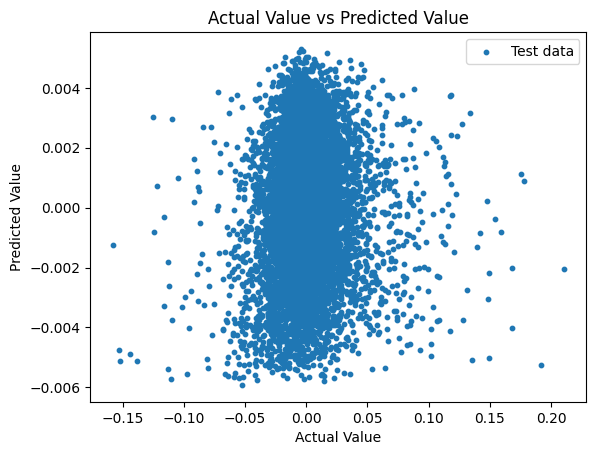

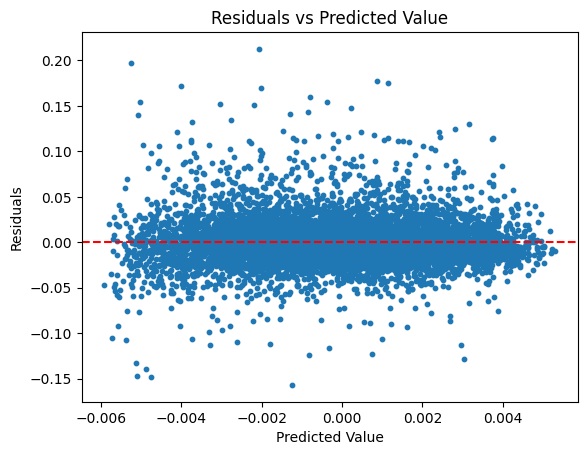

In [24]:
train_and_evaluate(X_train_pca, X_test_pca, y_train, y_test)